In [43]:
# Подключить пакеты
import numpy as np
import numpy
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema


In [236]:
# Example on economic data
#GET DATA

import yfinance as yf

#define the ticker symbol
tickerSymbol = 'AAPL'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2019-1-25')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,6.577644,6.584433,6.498328,6.503574,352410800,0.0,0.0
2010-01-04,6.586901,6.619924,6.554496,6.604801,493729600,0.0,0.0
2010-01-05,6.623009,6.653562,6.581345,6.616219,601904800,0.0,0.0
2010-01-06,6.616220,6.642453,6.504191,6.510980,552160000,0.0,0.0
2010-01-07,6.535053,6.542769,6.451726,6.498945,477131200,0.0,0.0
...,...,...,...,...,...,...,...
2019-01-17,37.719138,38.565497,37.489202,38.125195,119284800,0.0,0.0
2019-01-18,38.526358,38.619311,38.154547,38.360023,135004000,0.0,0.0
2019-01-22,38.259732,38.338006,37.332651,37.498989,121576000,0.0,0.0


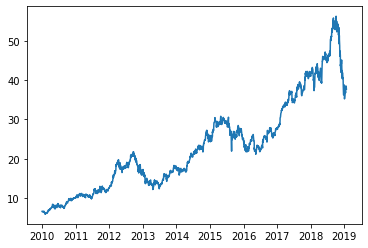

In [237]:
plt.plot(tickerDf['Open'])
x = tickerDf['Open']

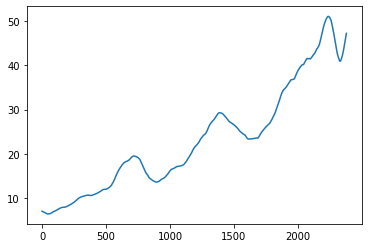

In [241]:
# Smooth DATA

window_len = 100

s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
w=np.ones(window_len,'d')
y=np.convolve(w/w.sum(),s,mode='valid')
plt.plot(y)

In [239]:
#Find peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(y, height=0 , distance=10 ,width = 15 )

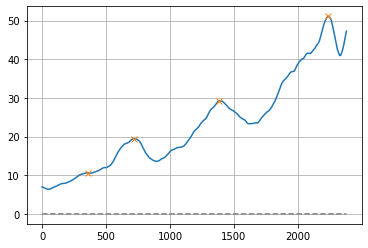

In [240]:
#fig = plt.figure(figsize = (6,8),dpi = 180)
plt.plot(y)
plt.grid()
plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")

5.0


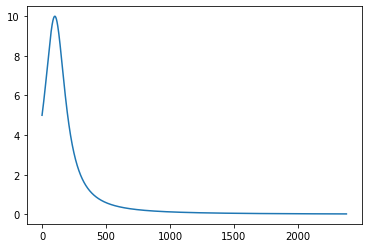

In [187]:
#Define lorenzian

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)
gam_i = 100
max_x = 100
a = 10
lor = []
for i in range(len(y)):
    lor.append(lorentzian(i,max_x,a,gam_i))
plt.plot(lor)
print(lor[0])


class Lorentzian:
    def __init__(self,array, x0, a, gam):
        self.x0 = x0
        self.a = a
        self.gam = gam
        lor = []
        for i in range(len(array)):
            lor.append(lorentzian(i,x0,a,gam))
        self.lor = lor
           

In [195]:
#lorentians = [Lorentzian(y,peak,y[peak],5) for peak in peaks]
lorentians = []
for peak in peaks:
    lorentians.append(  Lorentzian(y,peak, y[peak] , 100))

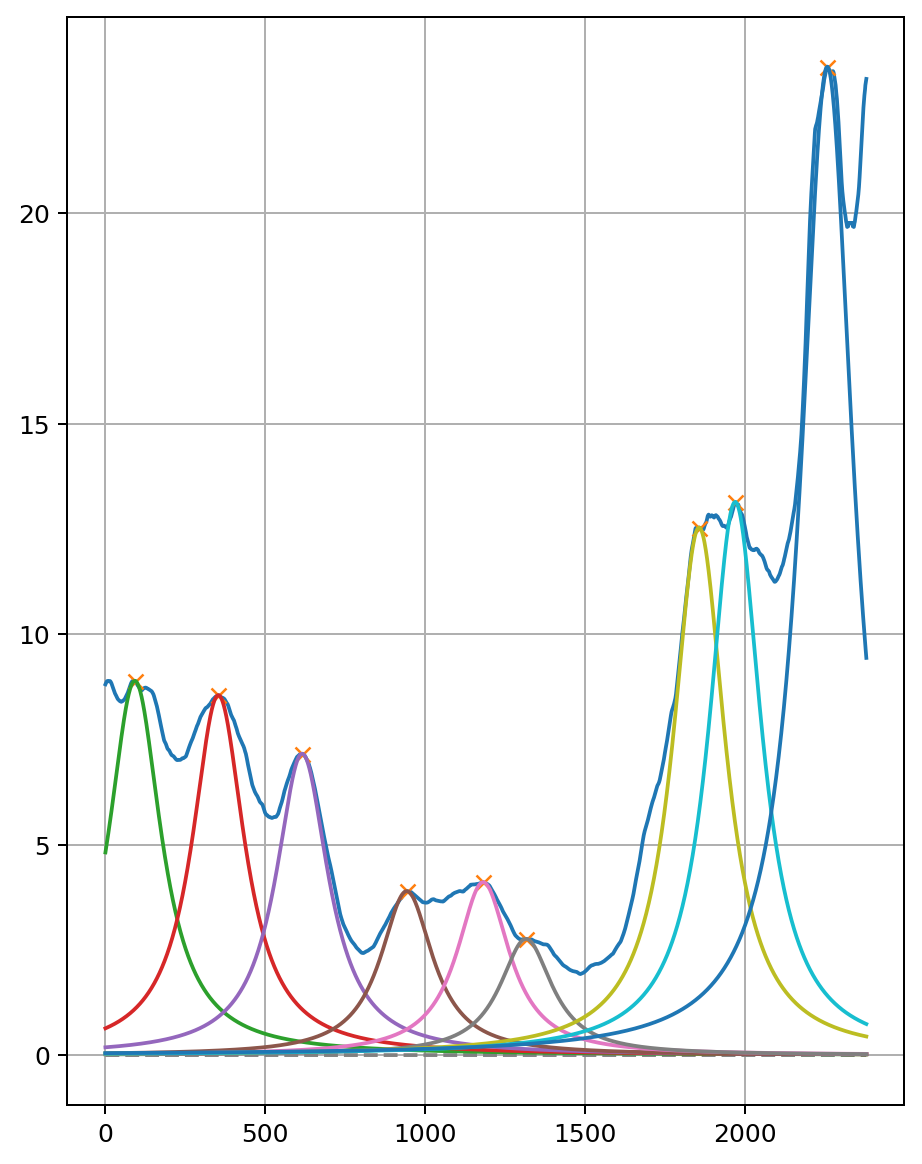

In [196]:
#PLOT PICTURE
fig = plt.figure(figsize = (6,8),dpi = 180)
plt.plot(y)
plt.grid()
plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
for lorenz in lorentians:
    plt.plot(lorenz.lor)

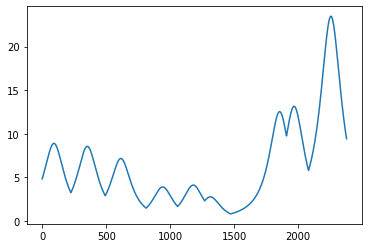

In [197]:
fit = [1]*len(y)

for x in range(len(fit)):
    current_lor = [lorenz.lor[x] for lorenz in lorentians ]
    fit[x] = max(current_lor)
    
plt.plot(fit)


In [198]:
#Get fit for debug
def get_fit(lorentians):
    fit = [1]*len(y)
    for x in range(len(fit)):
        current_lor = [lorenz.lor[x] for lorenz in lorentians ]
        fit[x] = max(current_lor)
    return fit

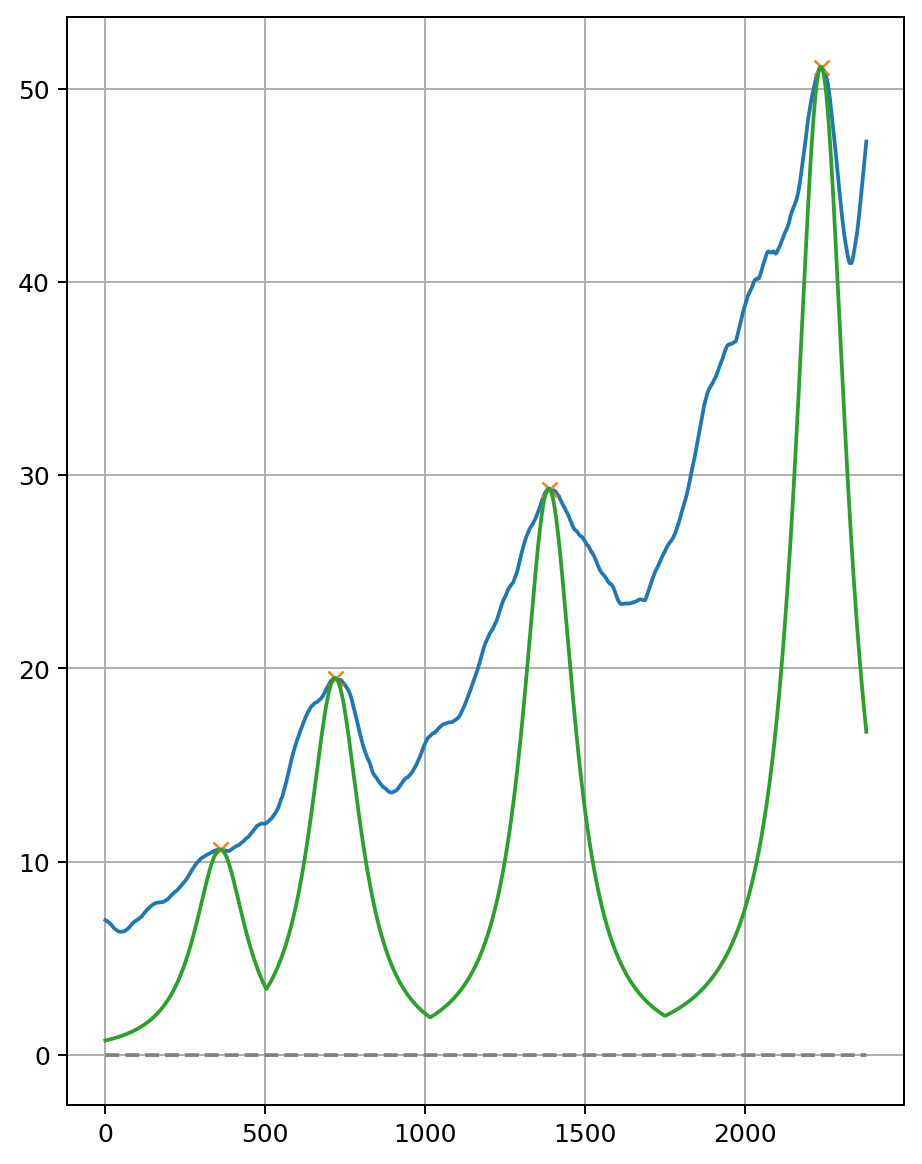

In [243]:
fig = plt.figure(figsize = (6,8),dpi = 180)
plt.plot(y)
plt.grid()
plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.plot(fit)

In [213]:
def get_fit_from_gamma(gamma):
    lorentians = []
    for i in range(len(peaks)):
        lorentians.append(  Lorentzian(y,peaks[i], y[peaks[i]] , gamma[i]))
    fit = get_fit(lorentians) 
    return fit

def plt_diff(fit,y):
    fig = plt.figure(figsize = (6,8),dpi = 180)
    plt.plot(y)
    plt.grid()
    plt.plot(peaks, y[peaks], "x")
    plt.plot(np.zeros_like(y), "--", color="gray")
    plt.plot(fit)

In [200]:
# ищем ошибку
def mse(A,B,power =2):
    return ((A - B)**power).mean(axis=0)
def sqears(A,B):
    return ((A - B)**2)

In [275]:
# Ищем ошибку от вариации гаммы

#Array for animation:
list_of_gamma = []


def loss_mse(gamma):
    lorentians = []
    for i in range(len(peaks)):
        lorentians.append(  Lorentzian(y,peaks[i], y[peaks[i]] , gamma[i]))
    fit = get_fit(lorentians) 
    loss =mse(fit,y , power = 4)
    print(f' loss = {loss}')
    print(f'gammas = {gamma}' )
    
    # ВОт это чисто для анимации
    list_of_gamma.append(gamma.copy())
    
    return loss

 loss = 324303.5701553428
gammas = [50, 50, 50, 50, 50, 50, 50, 50, 50]
 loss = 318520.1328804217
gammas = [51, 51, 51, 51, 51, 51, 51, 51, 51]
 loss = 312853.63923808426
gammas = [52, 52, 52, 52, 52, 52, 52, 52, 52]
 loss = 307301.08325962897
gammas = [53, 53, 53, 53, 53, 53, 53, 53, 53]
 loss = 301859.56544877595
gammas = [54, 54, 54, 54, 54, 54, 54, 54, 54]
 loss = 296526.2820886221
gammas = [55, 55, 55, 55, 55, 55, 55, 55, 55]
 loss = 291298.5354497593
gammas = [56, 56, 56, 56, 56, 56, 56, 56, 56]
 loss = 286173.71398922737
gammas = [57, 57, 57, 57, 57, 57, 57, 57, 57]
 loss = 281149.29279669054
gammas = [58, 58, 58, 58, 58, 58, 58, 58, 58]
 loss = 276222.8294416398
gammas = [59, 59, 59, 59, 59, 59, 59, 59, 59]
 loss = 271391.9598168994
gammas = [60, 60, 60, 60, 60, 60, 60, 60, 60]
 loss = 266654.39336684457
gammas = [61, 61, 61, 61, 61, 61, 61, 61, 61]
 loss = 262007.9146092011
gammas = [62, 62, 62, 62, 62, 62, 62, 62, 62]
 loss = 257450.37465133125
gammas = [63, 63, 63, 63, 63, 6

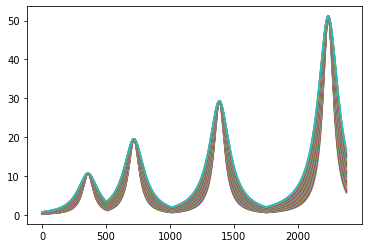

In [247]:
# Проверяю почему графики налождились
for g in range(50,100):
    gamma = [g]*9
    lorentians = []
    for i in range(len(peaks)):
        lorentians.append(  Lorentzian(y,peaks[i], y[peaks[i]] , gamma[i]))
    fit = get_fit(lorentians) 
    loss =mse(fit,y , power = 4)
    print(f' loss = {loss}')
    print(f'gammas = {gamma}' )
    plt.plot(fit)
    
plt.show()

In [276]:
# Launch Optimization
# Log intensive !!!

from scipy.optimize import minimize

gamma0 = [10]*4
sol1 = minimize(loss_mse,gamma0, method='COBYLA' , options={'disp': True})

 loss = 710220.5607529631
gammas = [10. 10. 10. 10.]
 loss = 710189.6593154946
gammas = [11. 10. 10. 10.]
 loss = 709888.1889500382
gammas = [11. 11. 10. 10.]
 loss = 708250.8341661916
gammas = [11. 11. 11. 10.]
 loss = 694666.4459984442
gammas = [11. 11. 11. 11.]
 loss = 681409.5043130248
gammas = [11.00225788 11.02202754 11.11963664 11.99257079]
 loss = 668565.9109867861
gammas = [11.00458686 11.04474878 11.28009085 12.97934977]
 loss = 656190.5887036033
gammas = [11.00698307 11.0681259  11.52874358 13.94765736]
 loss = 644950.9081252558
gammas = [11.00939358 11.09164256 12.02151122 14.81749712]
 loss = 634007.5322455417
gammas = [11.01138048 11.11102642 11.77622214 15.78675126]
 loss = 623199.9436889429
gammas = [11.01381433 11.46902963 11.92989064 16.70773647]
 loss = 612825.3343981828
gammas = [11.0160328  11.18119432 12.25858526 17.60723953]
 loss = 604033.4730496268
gammas = [11.60487874 11.21374851 12.30383213 18.41356044]
 loss = 593482.3274650597
gammas = [11.53358577 11.2542

 loss = 188130.5609296893
gammas = [13.98471646 20.01240079 34.30312982 97.0193574 ]
 loss = 185933.689848846
gammas = [14.31063999 20.03086852 34.61220499 97.91261287]
 loss = 183711.6001615917
gammas = [14.17396298 19.93410541 34.93234076 98.84506629]
 loss = 181489.51339056296
gammas = [14.16865155 20.20438243 35.23631244 99.75858878]
 loss = 179275.03515612645
gammas = [ 14.21823521  20.25315672  35.73500965 100.62257004]
 loss = 177097.51300709444
gammas = [ 14.27181685  20.2951236   35.9955996  101.58561763]
 loss = 175093.18333426476
gammas = [ 14.36336869  20.15367432  36.64369727 102.3283018 ]
 loss = 173012.25155758305
gammas = [ 14.13202028  20.31228228  37.04470873 103.20037475]
 loss = 170949.9060918498
gammas = [ 14.31103096  20.57566559  37.44498198 104.05965685]
 loss = 168874.251454708
gammas = [ 14.32249913  20.56728846  37.7727714  105.00430091]
 loss = 166821.6053328876
gammas = [ 14.29564445  20.69760928  38.26998851 105.86166341]
 loss = 164998.73082669533
gammas 

 loss = 57316.618953394966
gammas = [ 17.638179    34.94712752  77.30275455 182.26418123]
 loss = 56625.201129646586
gammas = [ 17.69688065  35.3219169   77.65615272 183.11928168]
 loss = 55941.43188423614
gammas = [ 17.81001954  35.57591457  78.32161814 183.81198691]
 loss = 55306.688250761414
gammas = [ 17.88736862  36.08676927  78.55967392 184.63440654]
 loss = 54646.98388195967
gammas = [ 17.68009892  36.11670969  79.00720572 185.50380756]
 loss = 53981.67536297218
gammas = [ 17.74746768  36.36374334  79.67111203 186.20642   ]
 loss = 53355.88161846234
gammas = [ 17.71907229  36.82922063  79.92703091 187.05319631]
 loss = 52774.93967532379
gammas = [ 17.98271652  37.22609012  80.65110463 187.55189819]
 loss = 52257.62313386058
gammas = [ 18.46767688  37.0664328   80.84525684 188.38953052]
 loss = 51605.732062648705
gammas = [ 18.43584225  37.23103305  81.36939349 189.22450004]
 loss = 50962.12528830591
gammas = [ 18.50146016  37.48915309  81.84441791 190.06320149]
 loss = 50353.676

 loss = 18055.754924591554
gammas = [ 21.34875398  56.53163151 125.06416189 253.96477203]
 loss = 17864.582621102836
gammas = [ 21.79178162  57.09322138 125.68781207 254.28005568]
 loss = 17624.13306112995
gammas = [ 21.8208598   57.35079295 126.2773158  255.04510254]
 loss = 17387.557896658138
gammas = [ 21.93392515  57.66017977 126.77526373 255.8473144 ]
 loss = 17173.252746437203
gammas = [ 22.27367147  58.10682008 127.07568767 256.61856685]
 loss = 16943.052285800943
gammas = [ 22.25087305  58.48708135 127.66937529 257.32738037]
 loss = 16724.109895876612
gammas = [ 22.35550594  59.04988251 128.16238774 257.9825487 ]
 loss = 16501.882973455882
gammas = [ 22.54698042  59.2247488  128.79838363 258.70936953]
 loss = 16286.088120480777
gammas = [ 22.8144287   59.66159008 129.32572893 259.38726927]
 loss = 16074.091264469915
gammas = [ 22.73473273  59.90317755 129.69206229 260.28230218]
 loss = 15860.483770140414
gammas = [ 22.67831409  60.22276551 130.389288   260.92148664]
 loss = 156

 loss = 4982.261204780491
gammas = [ 29.10487226  88.54036675 177.93080138 320.00529765]
 loss = 4912.992765037831
gammas = [ 29.36569544  88.84249306 178.72027764 320.47157889]
 loss = 4844.421971544037
gammas = [ 29.64849295  89.10050164 179.12546701 321.301807  ]
 loss = 4778.845085871819
gammas = [ 29.95660339  89.37236146 179.93640698 321.71838419]
 loss = 4713.520011454179
gammas = [ 30.28130545  89.59979055 180.30696775 322.55834211]
 loss = 4651.863021290512
gammas = [ 30.64409907  89.83500989 181.12897224 322.92896492]
 loss = 4594.303381869489
gammas = [ 30.6014287   90.65994257 181.48716068 323.36412737]
 loss = 4539.854525201704
gammas = [ 30.19049392  90.73110057 182.11799398 324.01843502]
 loss = 4472.736565286454
gammas = [ 30.35102847  91.12426078 182.70095596 324.71111751]
 loss = 4406.891121529622
gammas = [ 30.45280625  91.55164692 183.36919362 325.31148473]
 loss = 4342.282553141329
gammas = [ 30.53329294  91.97127697 183.85890747 326.07149319]
 loss = 4278.78600282

 loss = 1118.5350139239047
gammas = [ 47.27228371 131.22440792 236.64477082 383.51347078]
 loss = 1103.5506677842554
gammas = [ 47.63333732 131.22826772 237.35443496 384.11845194]
 loss = 1087.0554949136556
gammas = [ 47.84927425 131.73821428 238.0293497  384.60611561]
 loss = 1070.9051136300106
gammas = [ 48.16727016 132.19103704 238.55049447 385.25591425]
 loss = 1055.0745072261325
gammas = [ 48.26976138 132.58435124 239.23898587 385.85656314]
 loss = 1039.9506959057903
gammas = [ 48.61467297 132.97171499 239.66318304 386.59888522]
 loss = 1025.0482184666678
gammas = [ 48.62932392 133.29647638 240.37126684 387.22572869]
 loss = 1011.3437426358473
gammas = [ 48.95340574 133.57588924 240.69877011 388.06813063]
 loss = 996.813163628778
gammas = [ 49.39572966 134.01750283 241.3919451  388.42706716]
 loss = 982.7362178584202
gammas = [ 49.4141192  134.30479506 242.15653846 389.00371434]
 loss = 968.9530081131361
gammas = [ 49.82774234 134.59398455 242.61175489 389.73724235]
 loss = 959.12

 loss = 316.7476550651204
gammas = [ 79.67456102 174.99988834 295.22963147 433.00229768]
 loss = 313.6575035405899
gammas = [ 79.97178087 175.28522387 296.06040297 433.3765472 ]
 loss = 310.5735311923998
gammas = [ 80.63540741 175.76853951 296.60565879 433.54596358]
 loss = 307.47410720021236
gammas = [ 81.00810852 176.3507267  297.17302389 433.99345525]
 loss = 304.40674461988925
gammas = [ 81.57003774 176.66169772 297.79741215 434.4380583 ]
 loss = 301.6105677963757
gammas = [ 81.75833333 177.24800361 298.33864062 435.01065059]
 loss = 298.6991802018257
gammas = [ 82.21653795 177.70820349 299.07799829 435.18845618]
 loss = 295.9868551904574
gammas = [ 82.79454898 177.81764966 299.65583708 435.75416557]
 loss = 293.27278586848473
gammas = [ 83.44140496 178.42010809 299.9883795  436.08285495]
 loss = 290.44205167691706
gammas = [ 83.87647868 178.88033818 300.65763629 436.47143503]
 loss = 288.06449057248386
gammas = [ 84.38620449 179.05876247 301.02175082 437.23022682]
 loss = 285.4046

 loss = 168.54333223537932
gammas = [137.12938997 207.99935179 345.99432619 450.54605044]
 loss = 167.7522370096934
gammas = [137.89879613 208.36320383 346.38066039 450.19056241]
 loss = 166.97221723147908
gammas = [138.54806558 208.62882476 347.09251552 450.15654809]
 loss = 166.2398987890014
gammas = [139.49377822 208.81286084 347.24871649 450.37417064]
 loss = 165.46487090445706
gammas = [140.31112106 209.15143577 347.58436228 450.05065927]
 loss = 164.69180454953826
gammas = [141.03827828 209.39438029 348.22611008 450.07015588]
 loss = 164.00865659327022
gammas = [141.67534179 209.7622129  348.6408699  449.53459679]
 loss = 163.3211541150304
gammas = [142.65670189 209.94992675 348.65775442 449.57215729]
 loss = 162.57203004278352
gammas = [143.40831644 210.16958777 349.27715679 449.62841834]
 loss = 161.87076908853257
gammas = [144.13851885 210.50025164 349.66641835 449.1746108 ]
 loss = 161.23079258271895
gammas = [144.64167406 210.69730116 350.50513605 449.24213079]
 loss = 160.5

 loss = 124.40541923173922
gammas = [213.6587576  230.73085473 382.75855129 441.26460157]
 loss = 124.21493202081794
gammas = [214.44666276 230.91416683 383.29967879 441.0348557 ]
 loss = 124.03668133845126
gammas = [215.41317932 231.00018712 383.35506636 440.79952938]
 loss = 123.87164458897708
gammas = [216.08471847 231.70278805 383.56771609 440.69869687]
 loss = 123.69006823169
gammas = [216.95979139 231.87326225 383.97085969 440.90524267]
 loss = 123.50910498833946
gammas = [217.8315319  232.10798755 384.37595623 440.76078056]
 loss = 123.33522809152682
gammas = [218.77457706 232.3944532  384.53639188 440.81429376]
 loss = 123.17285234052697
gammas = [219.57698393 232.63260695 384.96980462 440.48025874]
 loss = 123.01073537637387
gammas = [220.3150051  233.01451623 385.48777845 440.68317044]
 loss = 122.86128097127477
gammas = [221.22611229 232.84391797 385.85066613 440.77852484]
 loss = 122.69944471163338
gammas = [222.12925976 233.19278974 386.09942849 440.75149851]
 loss = 122.5

 loss = 117.6548088648121
gammas = [284.47270448 252.20339883 396.52195883 439.82429864]
 loss = 117.65214778744122
gammas = [284.63362629 252.49935756 396.50384286 440.19333036]
 loss = 117.6380327237607
gammas = [285.08626742 252.59502039 396.42650106 440.02017472]
 loss = 117.62545869236706
gammas = [285.56656259 252.62692493 396.50267615 439.9083892 ]
 loss = 117.61428579008131
gammas = [285.94923712 252.84902579 396.4472025  439.6822165 ]
 loss = 117.60539845970311
gammas = [286.37577884 252.77054933 396.1999949  439.65407394]
 loss = 117.59370647763713
gammas = [286.84849505 252.90152581 396.28486919 439.60737374]
 loss = 117.58388668333123
gammas = [287.25565554 253.14962739 396.22768449 439.46810476]
 loss = 117.57740099054648
gammas = [287.66552043 253.06621459 396.3580217  439.22713737]
 loss = 117.56485303981404
gammas = [288.09938905 253.2029217  396.3783766  439.43366791]
 loss = 117.55299681926175
gammas = [288.55012374 253.33005693 396.33864624 439.6042445 ]
 loss = 117.

 loss = 117.18682885356854
gammas = [310.44919713 259.9382881  397.02139638 439.51453827]
 loss = 117.18436948253962
gammas = [310.66491149 260.06348159 397.00518114 439.52010326]
 loss = 117.18192845459613
gammas = [310.90536489 260.02694463 397.00970322 439.57778136]
 loss = 117.17937238908567
gammas = [311.14936063 260.07067337 397.04214195 439.57651369]
 loss = 117.17695418433777
gammas = [311.37135126 260.18378234 397.02548357 439.58872113]
 loss = 117.17447143287602
gammas = [311.61862883 260.18990741 396.98929326 439.59128015]
 loss = 117.17201522245028
gammas = [311.85937698 260.22408261 397.04504199 439.57501786]
 loss = 117.16955672326779
gammas = [312.09689821 260.30066433 397.03078994 439.57104502]
 loss = 117.16735590056547
gammas = [312.332164   260.23523446 396.97801423 439.561898  ]
 loss = 117.16521920875921
gammas = [312.56292974 260.26402445 396.99971868 439.65104522]
 loss = 117.16271221084509
gammas = [312.80463822 260.30548427 397.00439969 439.60271117]
 loss = 11

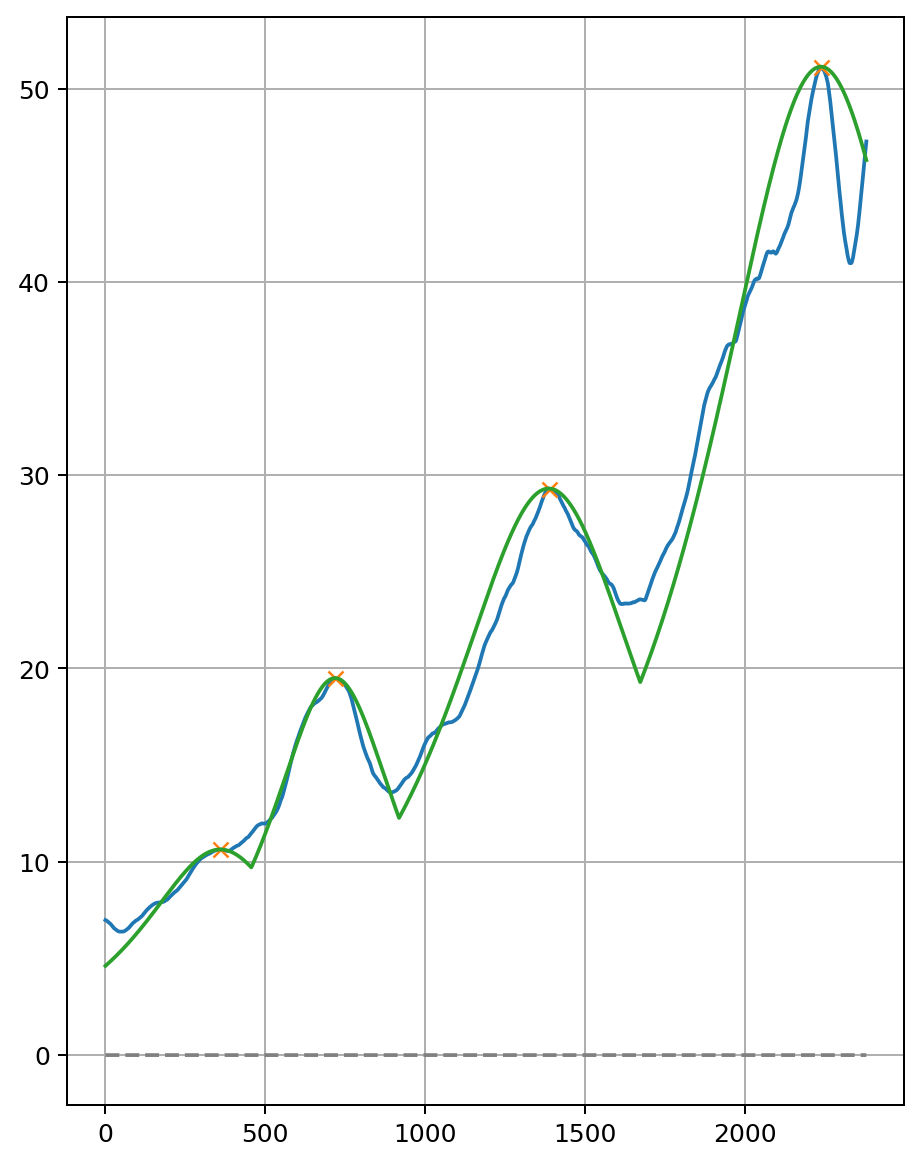

In [250]:
# Plot result Optimization

plt_diff(get_fit_from_gamma(sol1.x),y)

# Построим  красивую анимацию:

In [ ]:
from matplotlib.pyplot import savefig
from numpy import logspace

import matplotlib.animation as animation


from matplotlib.animation import FuncAnimation
from IPython.display import HTML


def animate(i):
    plt.cla()
    plt_diff(get_fit_from_gamma(list_off_gamma[i]),y) 
    

ani = FuncAnimation(plt.gcf(), animate, interval=800 ,frames = 50 )

plt.tight_layout()

HTML(ani.to_jshtml())


In [282]:
list_of_gamma

[array([10., 10., 10., 10.]),
 array([11., 10., 10., 10.]),
 array([11., 11., 10., 10.]),
 array([11., 11., 11., 10.]),
 array([11., 11., 11., 11.]),
 array([11.00225788, 11.02202754, 11.11963664, 11.99257079]),
 array([11.00458686, 11.04474878, 11.28009085, 12.97934977]),
 array([11.00698307, 11.0681259 , 11.52874358, 13.94765736]),
 array([11.00939358, 11.09164256, 12.02151122, 14.81749712]),
 array([11.01138048, 11.11102642, 11.77622214, 15.78675126]),
 array([11.01381433, 11.46902963, 11.92989064, 16.70773647]),
 array([11.0160328 , 11.18119432, 12.25858526, 17.60723953]),
 array([11.60487874, 11.21374851, 12.30383213, 18.41356044]),
 array([11.53358577, 11.2542601 , 12.36032921, 19.40859019]),
 array([11.82809594, 11.5074459 , 12.22674212, 20.32035507]),
 array([11.85422589, 11.64651741, 12.65956945, 21.21065662]),
 array([11.88151534, 11.46693524, 12.73679949, 22.19098363]),
 array([12.23914483, 11.57893894, 12.86925462, 23.10859573]),
 array([12.02920343, 11.8052189 , 12.9057810

# Чей то код

[ 9.96855817e-01  4.94106598e+02 -2.82103812e-01  4.66272776e+00
  2.80688160e+01 -2.72449246e-01  4.71728297e+00  1.31577189e+02
 -2.29698620e-01  4.20685231e+00  4.01421993e+02 -1.85917255e-01
  5.57859379e+00  2.29704607e+02 -1.47193791e-01  3.91112198e+00
  3.03387957e+02 -1.37127710e-01  4.39571908e+00]


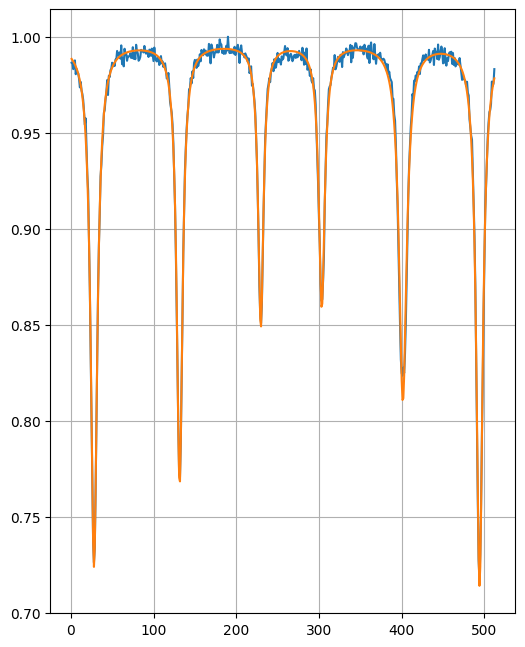

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range( 0, len( paramsRest ), 3 ) ] )

def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

xData, yData = np.loadtxt('HEMAT_1.dat', unpack=True )
yData = yData / max(yData)

generalWidth = 1

yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0

while max( yDataLoc ) - min( yDataLoc ) > .1:
    counter += 1
    if counter > 20: ### max 20 peak...emergency break to avoid infinite loop
        break
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]
    x0 = xData[ minP ]
    startValues += [ x0, minY - max( yDataLoc ), generalWidth ]
    popt, ier = leastsq( res_multi_lorentz, startValues, args=( xData, yData ) )
    yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]

print (popt)
testData = [ multi_lorentz(x, popt ) for x in xData ]

fig = plt.figure(figsize = (6,8),dpi = 100)
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.grid()
ax.plot( xData, testData )
plt.show()

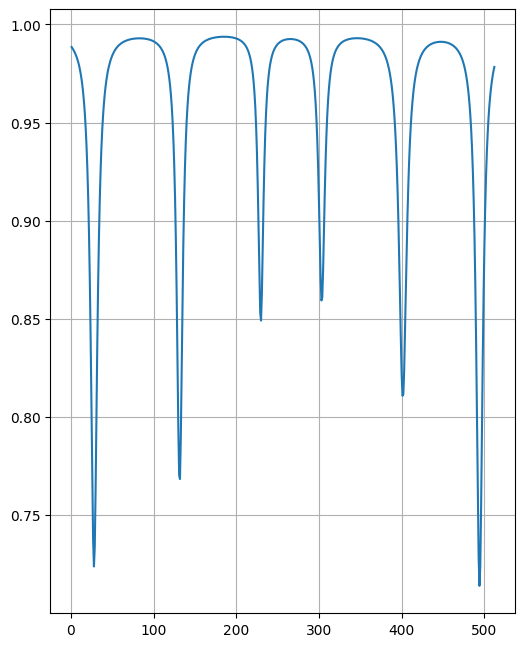

In [111]:
fig = plt.figure(figsize = (6,8),dpi = 100)
ax = fig.add_subplot( 1, 1, 1 )
#ax.plot( xData, yData )
ax.grid()
ax.plot( xData, testData )
plt.show()

In [115]:
xData = range(len(y))
yData = y / max(y)
yDataLoc = yData
startValues = [ max( yData ) ]

while max( yDataLoc ) - min( yDataLoc ) > .1:
    counter += 1
    if counter > 20: ### max 20 peak...emergency break to avoid infinite loop
        break
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]
    x0 = xData[ minP ]
    startValues += [ x0, minY - max( yDataLoc ), generalWidth ]
    popt, ier = leastsq( res_multi_lorentz, startValues, args=( xData, yData ) )
    yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]

print (popt)
testData = [ multi_lorentz(x, popt ) for x in range(tickerDf['Open']) ]

fig = plt.figure(figsize = (6,8),dpi = 100)
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.grid()
ax.plot( xData, testData )
plt.show()

/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 2800.
  warnings.warn(errors[info][0], RuntimeWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 3400.
  warnings.warn(errors[info][0], RuntimeWarning)


KeyboardInterrupt: 